In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
import os
from PIL import *
import matplotlib.image as mpimg
import numpy as np
from keras.preprocessing import image
import sys

Using TensorFlow backend.


In [2]:
from pathlib import Path

In [4]:
root_path = 'E:/code/thesis/chestData'
folder = 'CheXpert-v1.0-small'

In [24]:
valid_df = pd.read_csv(Path(root_path,folder,'valid.csv'))
valid_df

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/valid/patient64541/study1/...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Lateral,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CheXpert-v1.0-small/valid/patient64543/study1/...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/valid/patient64544/study1/...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,CheXpert-v1.0-small/valid/patient64736/study1/...,Female,57,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
230,CheXpert-v1.0-small/valid/patient64737/study1/...,Male,65,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
231,CheXpert-v1.0-small/valid/patient64738/study1/...,Male,71,Frontal,AP,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
232,CheXpert-v1.0-small/valid/patient64739/study1/...,Female,45,Frontal,AP,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
u_one_features = ['Atelectasis', 'Edema']
u_zero_features = ['Cardiomegaly', 'Consolidation', 'Pleural Effusion']
def feature_string(row):
    feature_list = []
    for feature in u_one_features:
        if row[feature] in [-1,1]:
            feature_list.append(feature)
            
    for feature in u_zero_features:
        if row[feature] == 1:
            feature_list.append(feature)
            
    return ';'.join(feature_list)

In [25]:
valid_df['feature_string'] = valid_df.apply(feature_string,axis = 1).fillna('')
valid_df['feature_string'] =valid_df['feature_string'].apply(lambda x:x.split(";"))
valid_df

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,feature_string
0,CheXpert-v1.0-small/valid/patient64541/study1/...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[Cardiomegaly]
1,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,[]
2,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Lateral,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,[]
3,CheXpert-v1.0-small/valid/patient64543/study1/...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[Edema]
4,CheXpert-v1.0-small/valid/patient64544/study1/...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,CheXpert-v1.0-small/valid/patient64736/study1/...,Female,57,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,[]
230,CheXpert-v1.0-small/valid/patient64737/study1/...,Male,65,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,[]
231,CheXpert-v1.0-small/valid/patient64738/study1/...,Male,71,Frontal,AP,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"[Edema, Cardiomegaly]"
232,CheXpert-v1.0-small/valid/patient64739/study1/...,Female,45,Frontal,AP,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[]


In [26]:
test_datagen=image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(dataframe=valid_df, directory=Path(root_path), 
                                                    target_size=(224,224),class_mode='categorical',
                                                    batch_size=1, shuffle=False, #classes = chexpert_targets,
                                                    x_col="Path", y_col="feature_string")

Found 234 validated image filenames belonging to 6 classes.


[0. 1. 0. 0. 0. 1.]
1.0 0.0


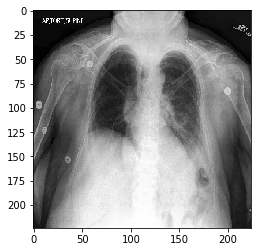

In [32]:
for X_batch, y in test_generator:
  x = X_batch[0]
  print(y[0])
  print(X_batch.max(), X_batch.min())
#   x = x.astype('float32') / 255.0
#   x = preprocess_input(x, data_format='channels_last')
  plt.imshow(x)
  plt.show()
  break

In [36]:
train_df = pd.read_csv(Path(root_path,folder,'train.csv'))
train_df['feature_string'] = train_df.apply(feature_string,axis = 1).fillna('')
train_df['feature_string'] =train_df['feature_string'].apply(lambda x:x.split(";"))
# train_df = train_df.iloc[:5000]

In [37]:
train_df = train_df.iloc[:5000]
train_df

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,feature_string
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,[]
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN,"[Atelectasis, Edema]"
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,[]
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,[]
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,[Edema]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,CheXpert-v1.0-small/train/patient01222/study5/...,Female,79,Frontal,AP,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,1.0,"[Edema, Pleural Effusion]"
4996,CheXpert-v1.0-small/train/patient01222/study1/...,Female,68,Frontal,AP,NaN,NaN,1.0,NaN,NaN,1.0,-1.0,NaN,-1.0,NaN,1.0,NaN,NaN,1.0,"[Atelectasis, Edema, Cardiomegaly, Pleural Eff..."
4997,CheXpert-v1.0-small/train/patient01222/study3/...,Female,79,Frontal,AP,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,"[Edema, Cardiomegaly, Pleural Effusion]"
4998,CheXpert-v1.0-small/train/patient01222/study8/...,Female,79,Frontal,AP,NaN,NaN,-1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,"[Edema, Pleural Effusion]"


In [38]:
datagen=image.ImageDataGenerator(rescale=1./255, 
#                                  featurewise_center=True,
#                                  featurewise_std_normalization=True,
                                 rotation_range=5,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 horizontal_flip=True,
                                 validation_split = 0.1)

train_generator=datagen.flow_from_dataframe(dataframe=train_df, directory=Path(root_path), 
                                                x_col="Path", y_col="feature_string", seed = 42, #classes = chexpert_targets,
                                                class_mode="categorical", target_size=(224,224), batch_size=8, subset = "training")

validation_generator = datagen.flow_from_dataframe(dataframe=train_df, directory=Path(root_path), 
                                                       x_col="Path", y_col="feature_string", seed = 42, #classes = chexpert_targets,
                                                       class_mode="categorical", target_size=(224,224), batch_size=8, subset = "validation")

Found 4500 validated image filenames belonging to 6 classes.
Found 500 validated image filenames belonging to 6 classes.


In [39]:
import cv2
from PIL import Image
import numpy as np
from keras import layers
from keras.applications import DenseNet121
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
import os
from PIL import *
import matplotlib.image as mpimg
import numpy as np
from keras.preprocessing import image
import json
import random
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D, ReLU, MaxPool2D,InputLayer
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU   
from keras import optimizers, regularizers
from sklearn.metrics import classification_report
from keras.callbacks import TensorBoard
import datetime
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input
from keras.applications import DenseNet121
from keras import layers

In [ ]:
# def load_data(data):
#   x_train = []
#   y_train = []
#   rows = data.shape[0]
#   for i in range(rows):
#     path = data.iloc[i][0]
#     label = data.iloc[i][1:].to_numpy().astype('float32')
#     ## load image
#     img = image.load_img(Path(root_path,path), target_size=(224,224))
#     img = image.img_to_array(img) /255.0
# #     img = preprocess_input(img, mode='torch')
#     x_train.append(img)
#     y_train.append(label)
  
#   return x_train, y_train

In [ ]:
# x_train, y_train = load_data(sub_data)
# x_train,y_train = np.array(x_train),np.array(y_train)
# x_train, x_val, y_train, y_val = train_test_split(
#     x_train, y_train, 
#     test_size=0.15, 
#     random_state=2019
#   )
# x_train.shape

In [102]:
def get_model(input_shape):
  
  base_model =ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
  #for layer in  base_model.layers[:10]:
    #layer.trainable = False
    #layer.padding='same'
 
  #for layer in  base_model.layers[10:]:
    #layer.trainable = True
    #layer.padding='same'
    
#   x = base_model.get_layer('avg_pool').output
  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  # x = BatchNormalization()(x)
  x = Dropout(0.5)(x)

#   x = Flatten() (x)
#   x = Dropout(0.5)(x)
  # x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
#   x = BatchNormalization()(x)
#   x = Dropout(0.5)(x)
#   x = Dense(32, activation='relu')(x)
#   x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
#   x = Dropout(0.5)(x)
#   x = BatchNormalization()(x)
#   x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
#   x = Dropout(0.5)(x)
#   x = BatchNormalization()(x)
#   x = Dense(512, activation='relu')(x)
  # x = LeakyReLU(alpha=0.1)(x)
    
#   x = Dropout(0.3)(x)
  #x = Dense(5, activation='softmax')(x)
  #model = Model(base_model.input, x)
  predictions = Dense(6, activation='sigmoid')(x)
  model = Model(inputs=base_model.input, outputs=predictions)
#   for layer in model.layers[:-2]:
#     layer.trainable = False

  return model

# def get_model(input_shape):
#     densenet = DenseNet121(
#     weights='./DenseNet-BC-121-32-no-top.h5',
#     include_top=False,
#     input_shape=input_shape
#     )

#     model = Sequential()
#     model.add(densenet)
#     model.add(layers.GlobalAveragePooling2D())
#     model.add(layers.Dropout(0.5))
#     model.add(layers.Dense(6, activation='sigmoid'))
    
    
#     return model

In [103]:
model = get_model((224,224,3))

In [104]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [105]:
import keras.backend as K

def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc
  
def unweighted_binary_crossentropy(y_true, y_pred):
    """
    Args:
        y_true: true labels
        y_pred: predicted labels

    Returns: the sum of binary cross entropy loss across all the classes

    """
    return K.sum(K.binary_crossentropy(y_true, y_pred))

In [106]:
adam = optimizers.Adam(lr=0.0001)
model.compile(
                optimizer=adam,
            #   optimizers.RMSprop(lr=2e-5),
#                 optimizer=sgd2,
                # loss='categorical_crossentropy',
                # loss='kullback_leibler_divergence',
                loss= 'binary_crossentropy',
#                     loss='categorical_crossentropy',
                    metrics=['accuracy', auc])

In [107]:
BS = 16
epoch = 10

In [108]:
# image_gen = ImageDataGenerator(
# #                               rescale=1./255
#                             # rotation_range=45,
#                             # width_shift_range=0.1,
#                             # height_shift_range=0.1,
# #                             zoom_range=0.15,
# #                             shear_range=0.1,
# #                             horizontal_flip=True,
# #                             vertical_flip=True,
# #                             fill_mode='constant',
# #                             cval=0.,
#                            data_format='channels_last'
#                            )
# img_gen=image_gen.flow(x_train, y_train, batch_size=BS, shuffle=True)

In [109]:
# import imgaug.augmenters as iaa
# def create_custom_gen(img_gen):
#     seq = iaa.Sequential([
#       iaa.Fliplr(0.5),  # horizontal flips
#       iaa.Affine(rotate=(-15, 15)),  # random rotate image
#       iaa.Affine(scale=(0.8, 1.1)),  # randomly scale the image
#       ], random_order=True)  # apply augmenters in random order
#     for X_batch, y_batch in img_gen:
#         hue = seq(images = X_batch)
#         yield hue, y_batch

# cus_gen = create_custom_gen(img_gen)

In [110]:
# for X_batch, y in cus_gen:
#   x = X_batch[0]
#   print(y[0])
#   print(X_batch.max(), X_batch.min())
# #   x = x.astype('float32') / 255.0
# #   x = preprocess_input(x, data_format='channels_last')
#   plt.imshow(x)
#   plt.show()
#   break

In [111]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
print(STEP_SIZE_TRAIN)
print(STEP_SIZE_VALID)

562
62


In [112]:
train_model = model.fit_generator(train_generator, 
                                  validation_data=validation_generator, 
                                  epochs=epoch, 
                                  steps_per_epoch=STEP_SIZE_TRAIN,
                                  validation_steps=STEP_SIZE_VALID,
                                  verbose=1)

Epoch 1/10
562/562 [==============================] - 84s 149ms/step - loss: 0.4878 - accuracy: 0.7749 - auc: 0.7017 - val_loss: 0.6055 - val_accuracy: 0.6452 - val_auc: 0.7317
Epoch 2/10
562/562 [==============================] - 73s 130ms/step - loss: 0.4368 - accuracy: 0.8012 - auc: 0.7457 - val_loss: 0.4079 - val_accuracy: 0.8079 - val_auc: 0.7618
Epoch 3/10
562/562 [==============================] - 72s 128ms/step - loss: 0.4193 - accuracy: 0.8091 - auc: 0.7727 - val_loss: 0.3820 - val_accuracy: 0.8076 - val_auc: 0.7815
Epoch 4/10
562/562 [==============================] - 72s 129ms/step - loss: 0.4060 - accuracy: 0.8175 - auc: 0.7887 - val_loss: 0.5228 - val_accuracy: 0.7913 - val_auc: 0.7942
Epoch 5/10
562/562 [==============================] - 71s 127ms/step - loss: 0.3967 - accuracy: 0.8206 - auc: 0.7996 - val_loss: 0.3270 - val_accuracy: 0.8066 - val_auc: 0.8036
Epoch 6/10
562/562 [==============================] - 72s 128ms/step - loss: 0.3838 - accuracy: 0.8298 - auc: 0.807

In [113]:
from sklearn.preprocessing import MultiLabelBinarizer
test = pd.Series(test_generator.labels)
mlb = MultiLabelBinarizer()
y_labels = mlb.fit_transform(test)


In [116]:
y_labels

array([[0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1]])

In [117]:
test_generator.reset()
y_pred_keras = model.predict_generator(test_generator,verbose = 1,steps=test_generator.n)

234/234 [==============================] - 10s 44ms/step


In [119]:
y_pred_keras.shape

(234, 6)

In [120]:
chexnet_targets = ['No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices']

chexpert_targets = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']


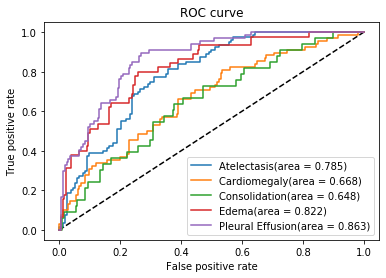

In [121]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')

for ii in range(1, y_pred_keras.shape[1]):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_labels[:,ii], y_pred_keras[:,ii])
    auc_keras = auc(fpr_keras, tpr_keras)
    plt.plot(fpr_keras, tpr_keras, label=chexpert_targets[ii-1] + '(area = {:.3f})'.format(auc_keras))
    
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()